Ilkka

In [1]:
import numpy as np
import pandas as pd
from numpy.ma.core import array
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.ma.extras import unique

from ucimlrepo import fetch_ucirepo

Ilkka

In [2]:
chronic_kidney_disease = fetch_ucirepo(id=336) 
data = chronic_kidney_disease.data.original

data

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


Ilkka

In [3]:
data.drop(columns=['pcc', 'ba','pc', 'rbc', 'sc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane'], inplace = True)


Ilkka

In [4]:
data.rename(columns={'bp': 'blood pressure', 'sg': 'specific gravity', 'al': 'albumin', 'su': 'sugar', 'bgr':'blood glucose random', 'bu':'blood urea', 'sod': 'sodium', 'pot':'potassium', 'hemo':'hemoglobin', 'pcv': 'packed cell volume', 'wbcc': 'white blood cell count', 'rbcc': 'reb blood cell count'}, inplace = True)
data

,age,blood pressure,specific gravity,albumin,sugar,blood glucose random,blood urea,sodium,potassium,hemoglobin,packed cell volume,white blood cell count,reb blood cell count,class
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,NaN,NaN,15.4,44.0,7800.0,5.2,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,NaN,NaN,11.3,38.0,6000.0,NaN,ckd
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,NaN,NaN,9.6,31.0,7500.0,NaN,ckd
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,111.0,2.5,11.2,32.0,6700.0,3.9,ckd
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,NaN,NaN,11.6,35.0,7300.0,4.6,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,150.0,4.9,15.7,47.0,6700.0,4.9,notckd
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,141.0,3.5,16.5,54.0,7800.0,6.2,notckd
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,137.0,4.4,15.8,49.0,6600.0,5.4,notckd
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,135.0,4.9,14.2,51.0,7200.0,5.9,notckd


Daniel

In [5]:
data['hemoglobin'] = data['hemoglobin'] / 10.0

Daniel

In [6]:
data.loc[data['class'] == 'ckd', 'class'] = 'a'
data.loc[data['class'] == 'ckd\t', 'class'] = 'a'


data.loc[data['class'] == 'notckd', 'class'] = 'c'

data['class'].unique()

<StringArray>
['a', 'c']
Length: 2, dtype: str

Veikko

In [7]:
data = data[data.isnull().sum(axis=1) < 3]

Janne

In [8]:
affecteddata = data[data['class'] == 'a']
controldata = data[data['class'] == 'c']

Janne

In [9]:
affecteddata['class']

0      a
3      a
4      a
5      a
6      a
      ..
243    a
244    a
246    a
248    a
249    a
Name: class, Length: 126, dtype: str

Janne

In [10]:
controldata['class']

250    c
251    c
252    c
253    c
254    c
      ..
395    c
396    c
397    c
398    c
399    c
Name: class, Length: 139, dtype: str

Janne

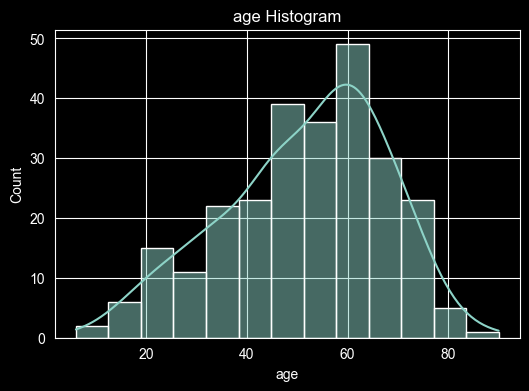

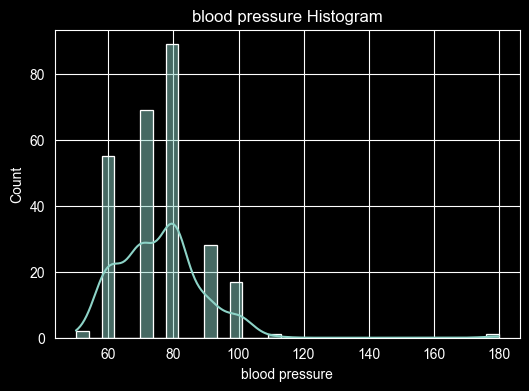

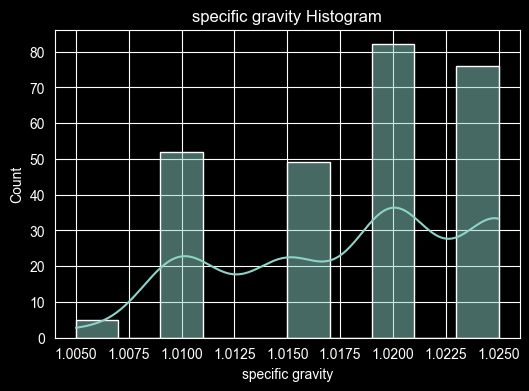

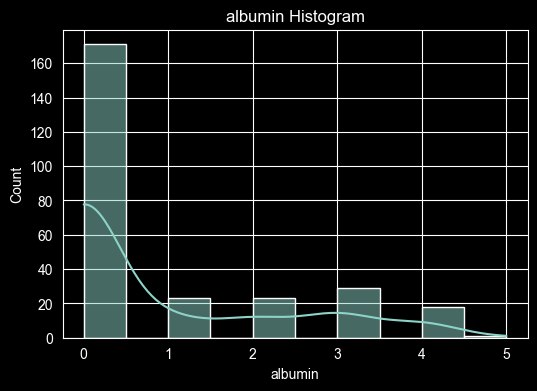

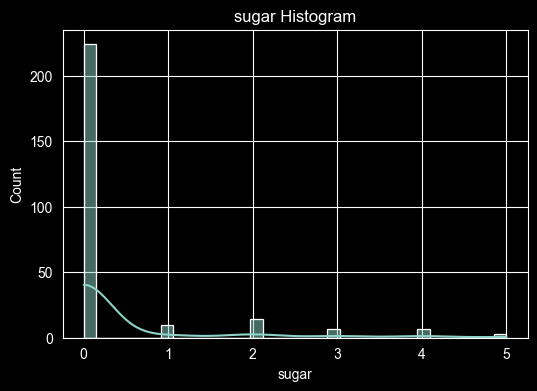

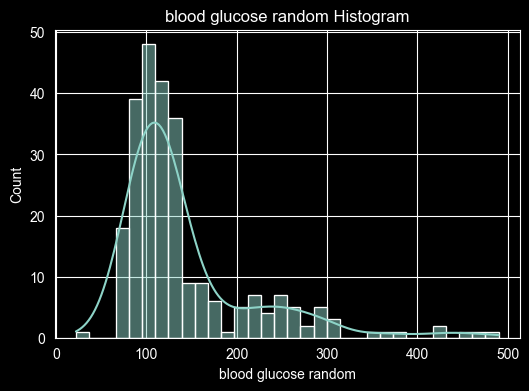

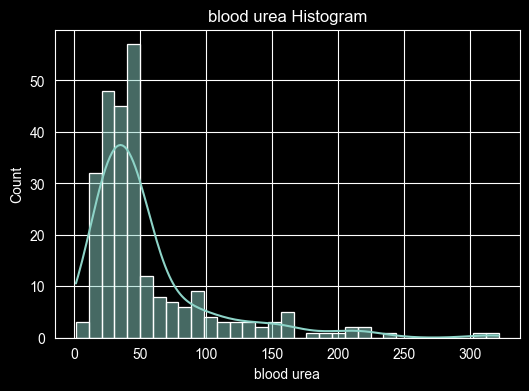

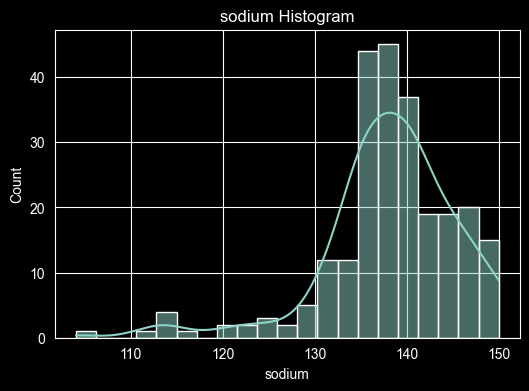

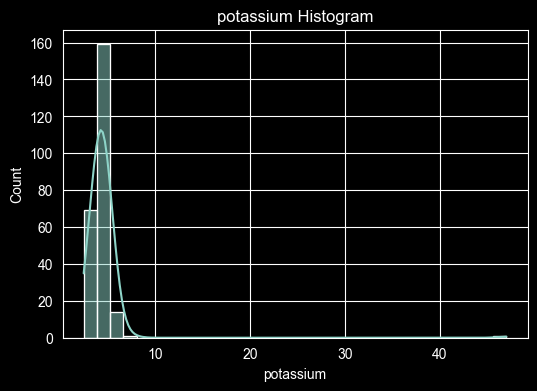

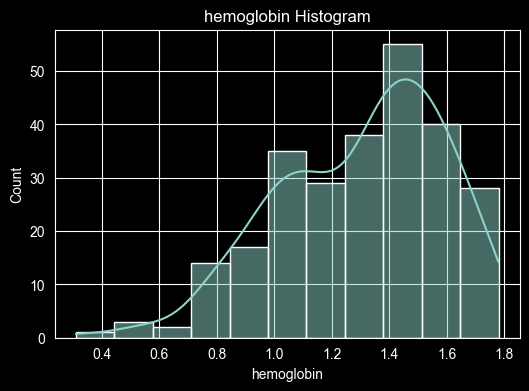

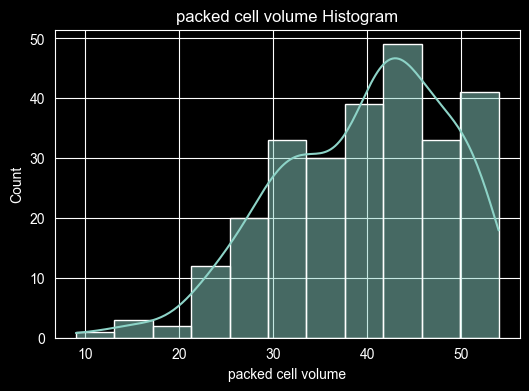

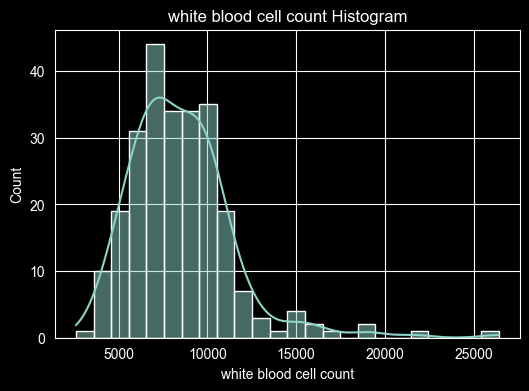

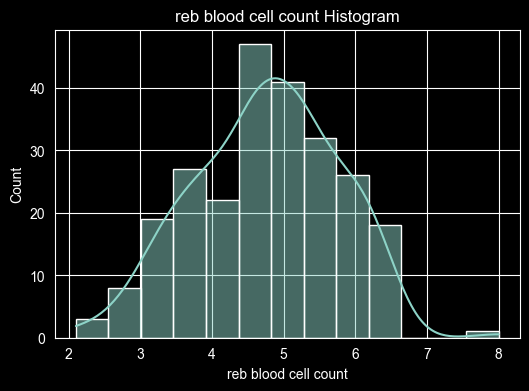

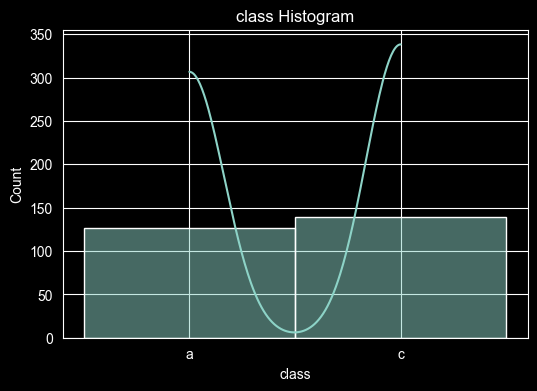

In [11]:
for column in data.columns:
    plt.figure(figsize=(6, 4)) 
    sns.histplot(data[column], kde=True)
    plt.title(f'{column} Histogram')
    plt.xlabel(column)
    plt.show()

Veikko

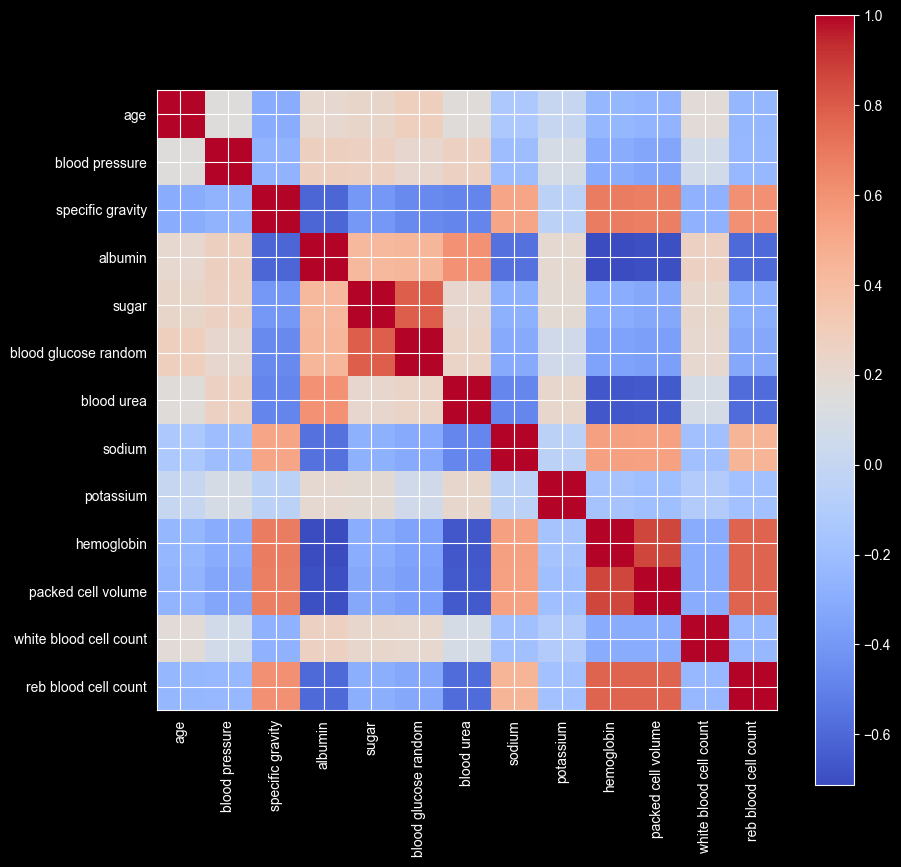

In [12]:
data_filtered = data.dropna()
data_filtered = data_filtered.loc[:, data_filtered.dtypes == float]

corr = data_filtered.corr()

plt.figure(figsize=(10, 10))
plt.imshow(corr, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.index)
plt.show()